<a href="https://colab.research.google.com/github/vain-ent/CNN-with-CIFAR-10/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
y_train, y_test = y_train.flatten(), y_test.flatten()

x_train, x_test = x_train / 255.0, x_test / 255.0


In [5]:
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.4),

    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=30,
    batch_size=64,
    verbose=1
)

Epoch 1/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 30ms/step - accuracy: 0.3704 - loss: 2.0572 - val_accuracy: 0.6126 - val_loss: 1.1069
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.6224 - loss: 1.0782 - val_accuracy: 0.6710 - val_loss: 0.9043
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.6945 - loss: 0.8709 - val_accuracy: 0.6534 - val_loss: 1.0407
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.7449 - loss: 0.7290 - val_accuracy: 0.7320 - val_loss: 0.7909
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.7742 - loss: 0.6488 - val_accuracy: 0.7912 - val_loss: 0.6033
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.7937 - loss: 0.5875 - val_accuracy: 0.7500 - val_loss: 0.7521
Epoch 7/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8124 - loss: 0.5484 - val_accuracy: 0.7914 - val_loss: 0.6147
Epoch 8/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.8312 - loss: 0.4804 - 

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n Final Test Accuracy: {test_acc:.5f}")



 Final Test Accuracy: 0.87240


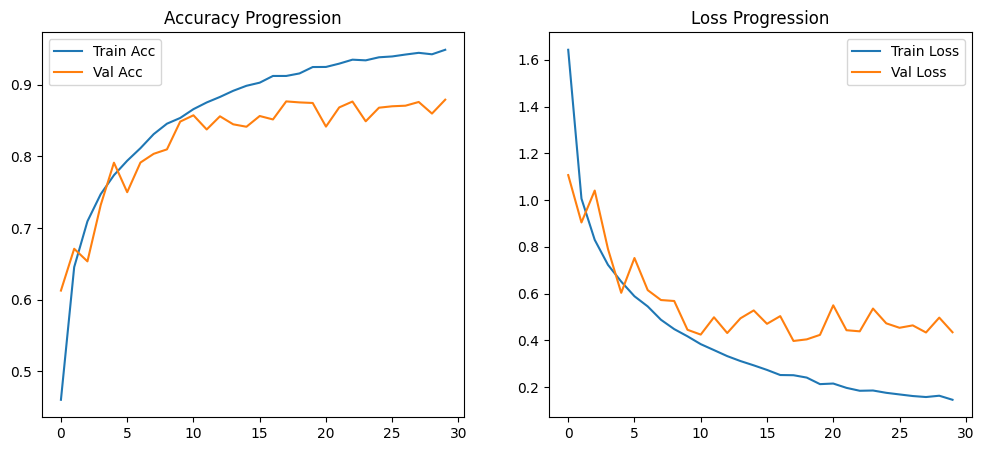

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('Accuracy Progression')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss Progression')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


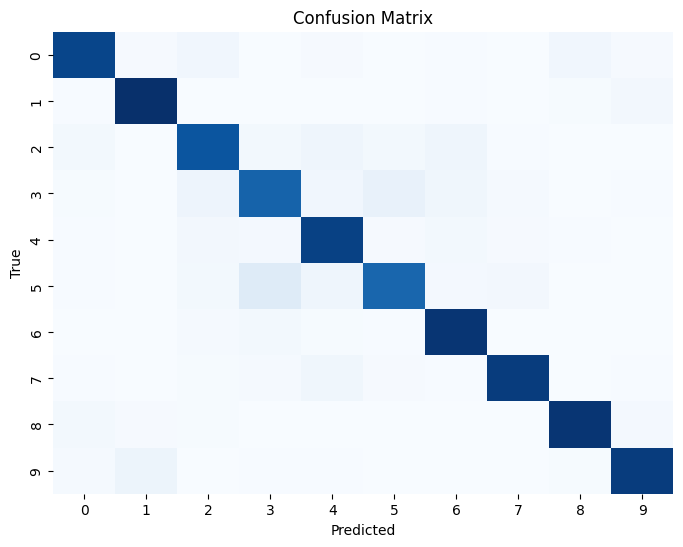

In [9]:
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [10]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1000
           1       0.92      0.95      0.93      1000
           2       0.82      0.81      0.82      1000
           3       0.78      0.76      0.77      1000
           4       0.82      0.89      0.85      1000
           5       0.85      0.75      0.80      1000
           6       0.86      0.93      0.89      1000
           7       0.93      0.91      0.92      1000
           8       0.93      0.93      0.93      1000
           9       0.92      0.91      0.91      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:

!git config --global user.name "vain-ent"
!git config --global user.email "your_email@example.com"
